<a href="https://colab.research.google.com/github/vvchcc2020/ExData_Plotting1/blob/master/EstimacionARMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
#from sm.tsa.statespace import SARIMAX
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

#Usamos Pandas para manejar las bases de Datos

data = pd.read_csv('AirPassengers.csv')
print(data)
print('\n Data Types:')
print(data.dtypes)

       Month  NPassengers
0    1949-01          112
1    1949-02          118
2    1949-03          132
3    1949-04          129
4    1949-05          121
..       ...          ...
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432

[144 rows x 2 columns]

 Data Types:
Month          object
NPassengers     int64
dtype: object


In [15]:
#shift+ctrl+v abre el explorador de variables
######Convertir el conjunto de datos en una serie de Timepo#####

con=data['Month']
data['Month']=pd.to_datetime(data['Month'])
##data.set_index('Month', inplace=True)
pasajeros=data.set_index('Month')
#check datatype of index

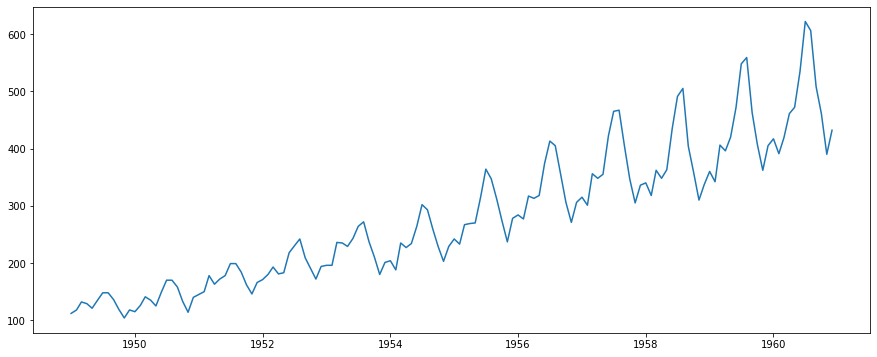

In [16]:
#convert to time series:
tsAirP = pasajeros['NPassengers']
tsAirP.head(10)
tsAirP.asfreq(freq='MS')
####Graficar la Serie y transformaciones#####
plt.plot(tsAirP)
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992, 0.74324019, 0.76039504, 0.71266087, 0.64634228,
       0.58592342, 0.53795519, 0.49974753, 0.46873401, 0.44987066,
       0.4416288 , 0.45722376, 0.48248203, 0.51712699, 0.53218983,
       0.49397569, 0.43772134, 0.3876029 , 0.34802503, 0.31498388,
       0.28849682, 0.27080187, 0.26429011, 0.27679934, 0.2985215 ,
       0.32558712, 0.3370236 , 0.30333486, 0.25397708, 0.21065534,
       0.17217092, 0.13840041, 0.11140324, 0.09098453, 0.08217177,
       0.08877222, 0.10386958, 0.12393082, 0.13263456, 0.10374723,
       0.06209805])

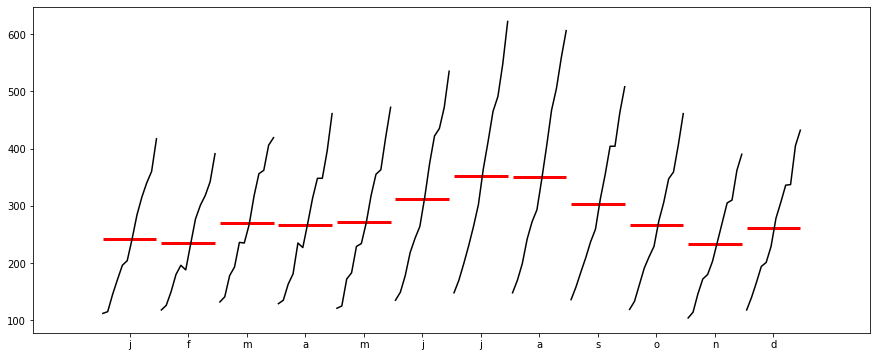

In [17]:
import statsmodels.api as smapi
smapi.graphics.tsa.month_plot(tsAirP)
acf(tsAirP,nlags=50,unbiased=False)

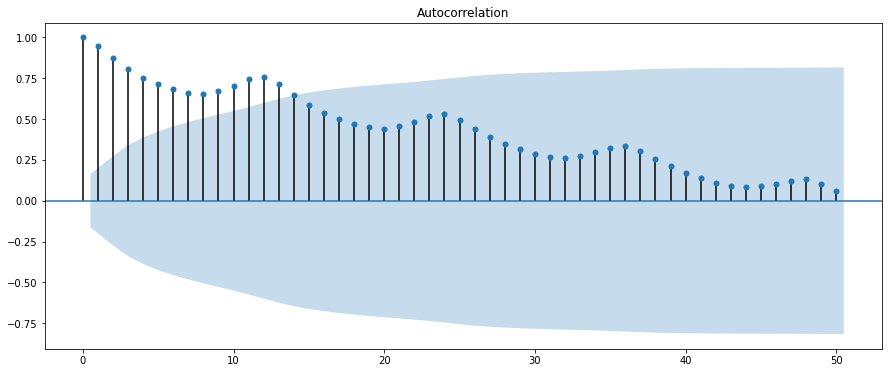

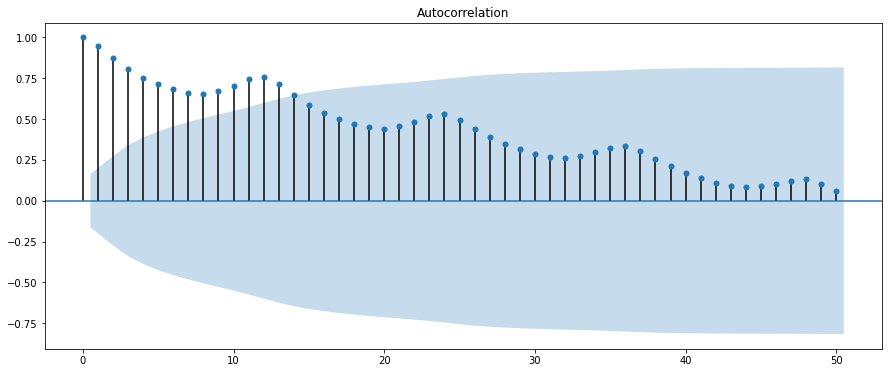

In [18]:
plot_acf(tsAirP,lags=50,unbiased=False)

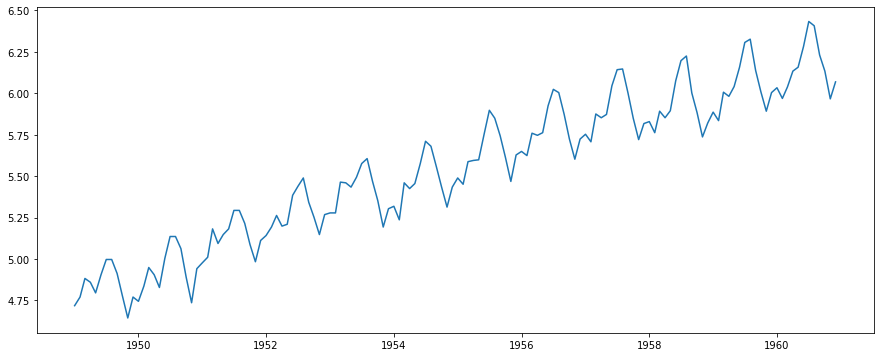

In [19]:
ltsAirP=np.log(tsAirP)
plt.plot(ltsAirP)

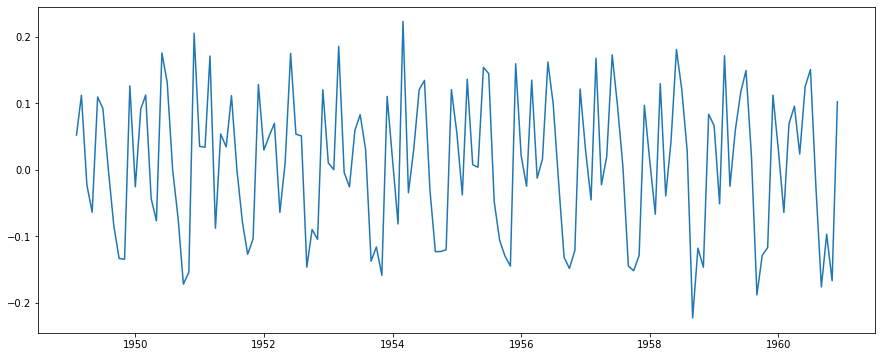

In [20]:
d1ltsAirP=ltsAirP.diff(periods=1)[1:]
plt.plot(d1ltsAirP)

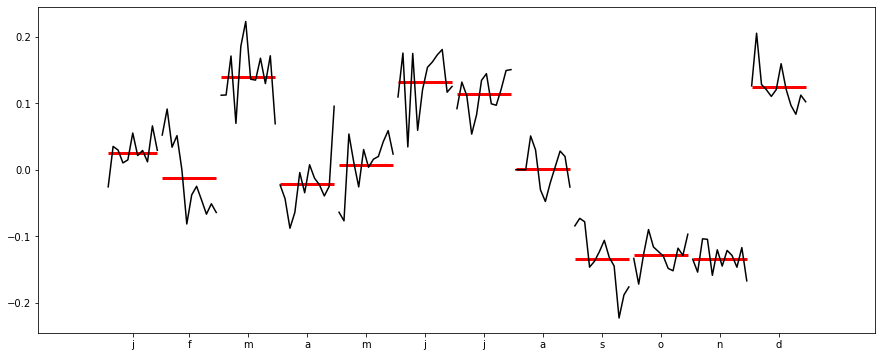

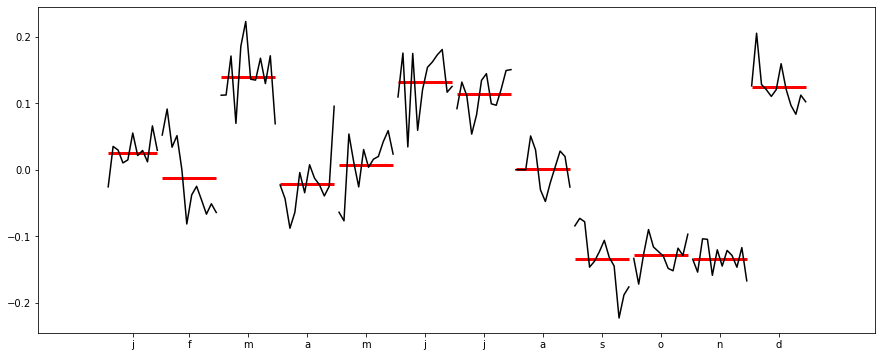

In [21]:
smapi.graphics.tsa.month_plot(d1ltsAirP)

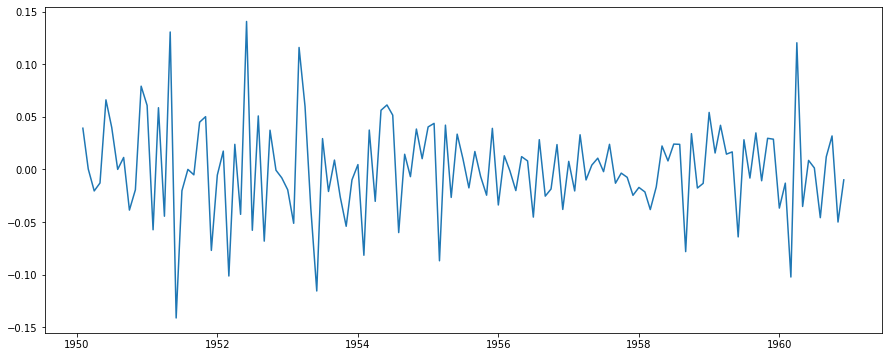

In [22]:
ds1d1ltsAirP=d1ltsAirP.diff(periods=12)[12:]
plt.plot(ds1d1ltsAirP)

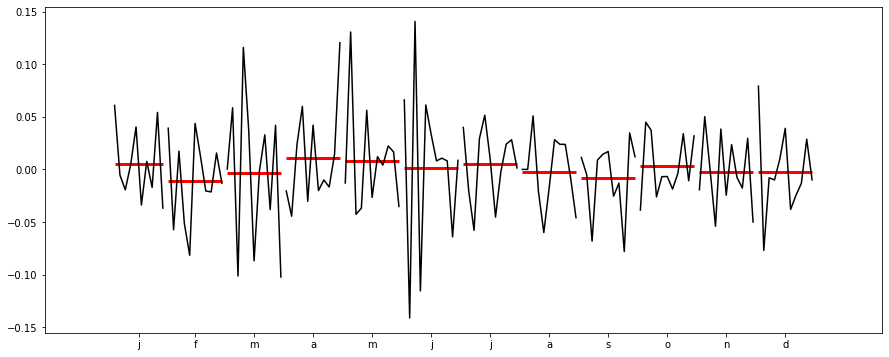

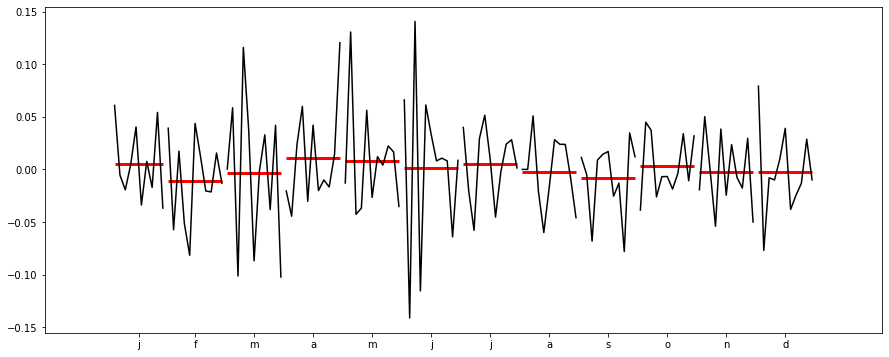

In [23]:
smapi.graphics.tsa.month_plot(ds1d1ltsAirP)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


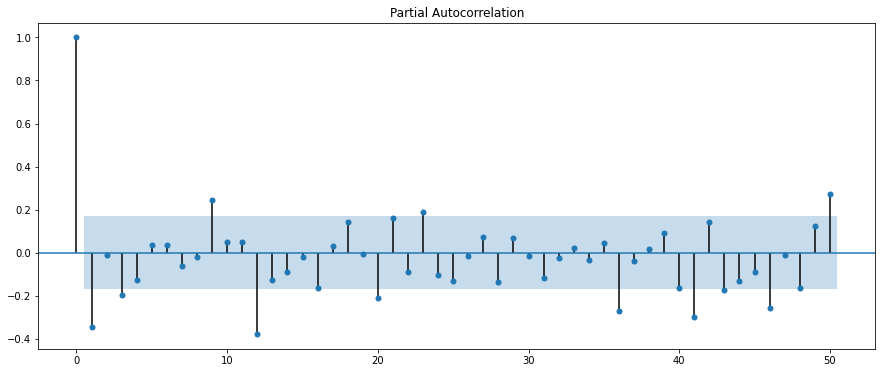

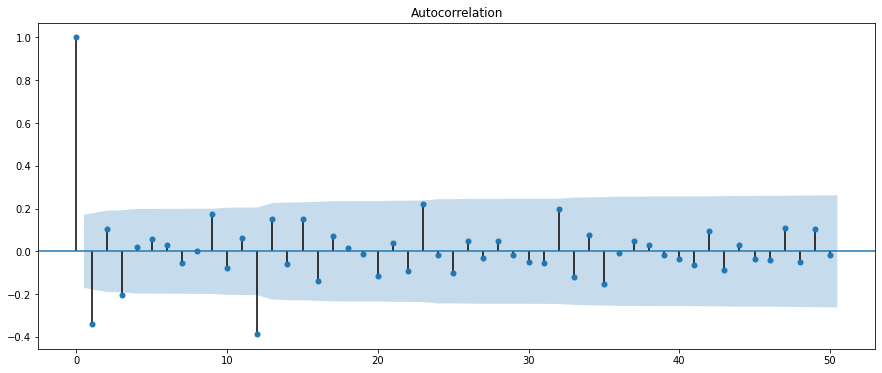

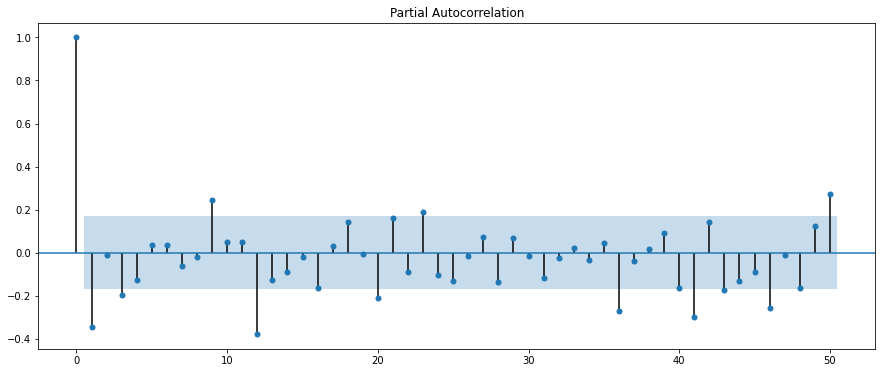

In [24]:
#######Identificación#######
acf(ds1d1ltsAirP,nlags=50,unbiased=False)
plot_acf(ds1d1ltsAirP,lags=50,unbiased=False)
pacf(ds1d1ltsAirP,nlags=50)
plot_pacf(ds1d1ltsAirP,lags=50)

In [25]:
#####Estimación#########
modeloAR=ARIMA(ds1d1ltsAirP,order=(12,0,0)) ####Ajuste de un AR(12)
ajusteAR=modeloAR.fit(trend='c')
print(ajusteAR.summary())

modeloMA=ARIMA(ds1d1ltsAirP,order=(0,0,12)) ####Ajuste de un MA(12)
ajusteMA=modeloMA.fit(trend='c')
print(ajusteMA.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:            NPassengers   No. Observations:                  131
Model:                    ARMA(12, 0)   Log Likelihood                 243.929
Method:                       css-mle   S.D. of innovations              0.037
Date:                Wed, 20 Jan 2021   AIC                           -459.858
Time:                        19:48:20   BIC                           -419.605
Sample:                    02-01-1950   HQIC                          -443.501
                         - 12-01-1960                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0002      0.002      0.109      0.914      -0.003       0.004
ar.L1.NPassengers     -0.3666      0.080     -4.571      0.000      -0.524      -0.209
ar.L2.NPassengers   

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                              ARMA Model Results                              
Dep. Variable:            NPassengers   No. Observations:                  131
Model:                    ARMA(0, 12)   Log Likelihood                 250.671
Method:                       css-mle   S.D. of innovations              0.034
Date:                Wed, 20 Jan 2021   AIC                           -473.341
Time:                        19:50:06   BIC                           -433.088
Sample:                    02-01-1950   HQIC                          -456.985
                         - 12-01-1960                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0003      0.000     -0.653      0.515      -0.001       0.001
ma.L1.NPassengers     -0.3046      0.049     -6.159      0.000      -0.402      -0.208
ma.L2.NPassengers   

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


In [26]:
####Especificando las entradas de los parámetros.#####
#ma_orden=[1,0,0,0,0,0,0,0,0,0,0,1]
#modeloMAfinal=ARIMA(ds1d1ltsAirP,order=(0,0,ma_orden)) ####Ajuste de un MA(12)
#ajusteMAfinal=modeloMAfinal.fit(trend='c')
#print(ajusteMAfinal.summary())


modeloMASPmodel = smapi.tsa.statespace.SARIMAX(ds1d1ltsAirP, trend='n', order=(0,0,12))  
####Si tiene parte estacional agregar seasonal_order=(0,0,0,12)###
results = modeloMASPmodel.fit()
print(results.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                           Statespace Model Results                           
Dep. Variable:            NPassengers   No. Observations:                  131
Model:              SARIMAX(0, 0, 12)   Log Likelihood                 250.309
Date:                Wed, 20 Jan 2021   AIC                           -474.619
Time:                        19:51:14   BIC                           -437.241
Sample:                    02-01-1950   HQIC                          -459.431
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2984      0.182     -1.641      0.101      -0.655       0.058
ma.L2         -0.0031      0.184     -0.017      0.986      -0.363       0.357
ma.L3         -0.1765      0.217     -0.812      0.4

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [27]:
####Especificando las entradas de los parámetros.#####
ma_orden=[1,0,0,0,0,0,0,0,0,0,0,1]

modeloMASPmodelfinal = smapi.tsa.statespace.SARIMAX(ds1d1ltsAirP, trend='n', order=(0,0,ma_orden))  
####Si tiene parte estacional agregar seasonal_order=(0,0,0,12)###
resultsMAfinal = modeloMASPmodelfinal.fit()

print(resultsMAfinal.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             Statespace Model Results                             
Dep. Variable:                NPassengers   No. Observations:                  131
Model:             SARIMAX(0, 0, (1, 12))   Log Likelihood                 241.063
Date:                    Wed, 20 Jan 2021   AIC                           -476.126
Time:                            19:51:19   BIC                           -467.501
Sample:                        02-01-1950   HQIC                          -472.621
                             - 12-01-1960                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2970      0.068     -4.390      0.000      -0.430      -0.164
ma.L12        -0.4605      0.093     -4.932      0.000      -0.644      -0.277
sigma2         0.001

In [28]:
####Etapa de pronosticos######
pronosticosMA=resultsMAfinal.forecast(steps=12)
modeloMASPmodelfinal
salforecastMA=resultsMAfinal.get_prediction(start=131, end=142,full_results=True,alpha=0.05,dynamic=False)

salforecastMA.conf_int(alpha=0.05)

salforecastMAotro=resultsMAfinal.get_forecast(steps=12)

ICforecastMA95=salforecastMAotro.conf_int(alpha=0.05)
pronosticosMA=salforecastMAotro.predicted_mean

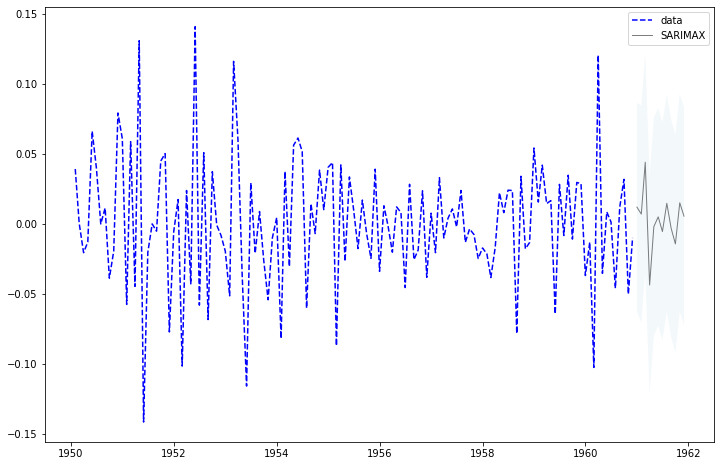

In [29]:
#######Gráfica de los pronósticos#####
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)
#Actual data
ax.plot(ds1d1ltsAirP.astype('float64'), '--', color="blue", label='data')
# Means
ax.plot(pronosticosMA, lw=1, color="black", alpha=0.5, label='SARIMAX')
ax.fill_between(pronosticosMA.index, ICforecastMA95.iloc[:, 0], ICforecastMA95.iloc[:, 1], alpha=0.05)
ax.legend(loc='upper right')
plt.draw()

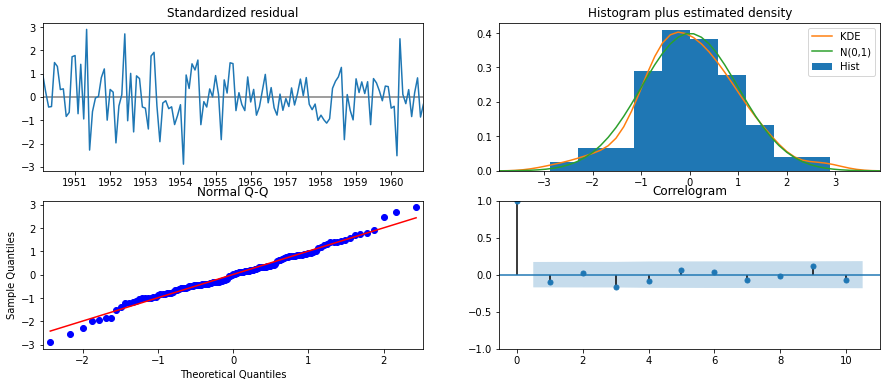

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


array([[[ 1.18508286,  1.2324956 ,  5.21276045,  6.0800316 ,
          6.73309623,  6.91890113,  7.57843068,  7.63428893,
          9.74204994, 10.41027053, 10.4112674 , 12.23110522,
         14.64361447, 14.92842398, 15.82922457, 20.11613641,
         20.28440522, 20.31364702, 20.98101409, 22.59214769,
         22.64573558, 23.09528546, 30.92096106, 30.95549945,
         31.01767045, 31.84894532, 31.85401712, 32.0508723 ,
         32.4673941 , 33.4149928 , 34.06657065, 38.37058368,
         41.37812665, 41.41653896, 42.59384166, 42.67467122,
         44.42220358, 45.50459767, 45.51153531, 45.76060893],
        [ 0.27632365,  0.5399667 ,  0.15686446,  0.19325066,
          0.24125897,  0.32841239,  0.37122935,  0.46998365,
          0.37176859,  0.40526547,  0.49381625,  0.4273024 ,
          0.33012619,  0.38306501,  0.39349147,  0.21503541,
          0.25994152,  0.31544116,  0.33785092,  0.30926167,
          0.36315383,  0.39636591,  0.12474732,  0.15506994,
          0.18843433,  

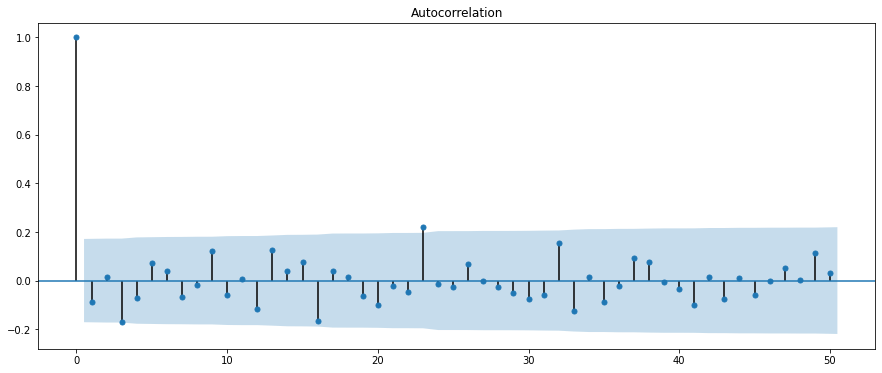

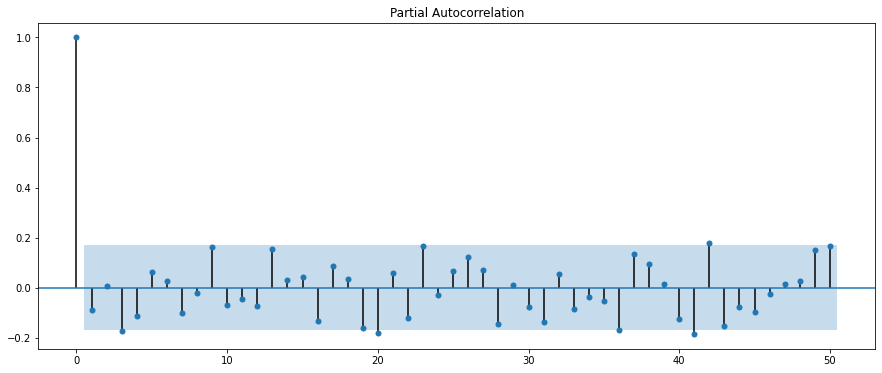

In [30]:
#####Análisis de Residuales######
residuales=resultsMAfinal.resid
resultsMAfinal.plot_diagnostics()
plt.show()

resultsMAfinal.test_heteroskedasticity(method='breakvar')

resultsMAfinal.test_normality(method='jarquebera')

acf(residuales,nlags=50,unbiased=False)
plot_acf(residuales,lags=50,unbiased=False)
pacf(residuales,nlags=50)
plot_pacf(residuales,lags=50)

resultsMAfinal.test_serial_correlation(method='ljungbox')

In [32]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 7.9MB/s 
     |████████████████████████████████| 2.1MB 31.5MB/s 
     |████████████████████████████████| 9.5MB 33.2MB/s 
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  250
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -341.622
Date:                Wed, 20 Jan 2021   AIC                            689.245
Time:                        19:52:59   BIC                            699.809
Sample:                             0   HQIC                           693.497
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7376      0.049     15.138      0.000       0.642       0.833
ma.L1          0.7031      0.046     15.400      0.000       0.614       0.793
sigma2         0.8921      0.080     11.193      0.0

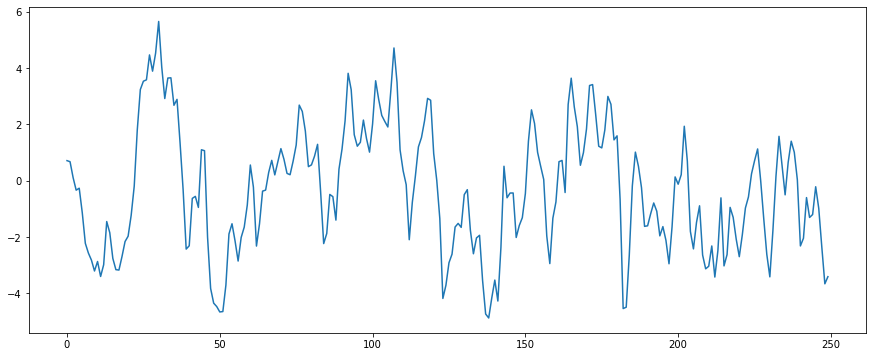

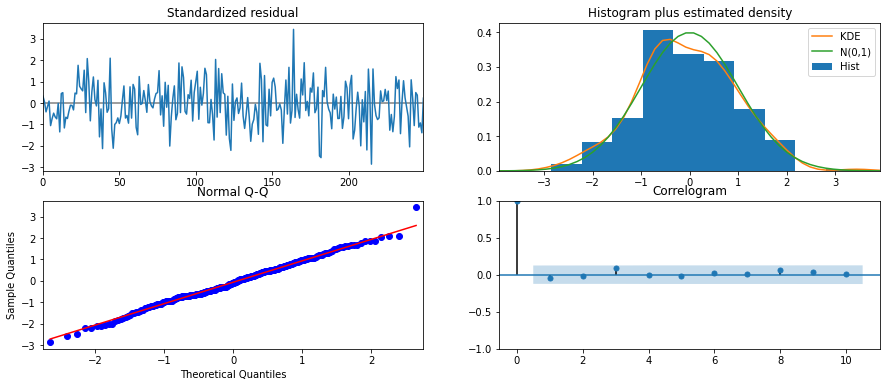

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                        NPassengers   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 244.686
Date:                            Wed, 20 Jan 2021   AIC                           -483.372
Time:                                    19:53:01   BIC                           -474.746
Sample:                                01-01-1949   HQIC                          -479.867
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4135      0.073     -5.658      0.000      -0.557      -0.270
ma.S.L12      -0.5512      0.097   

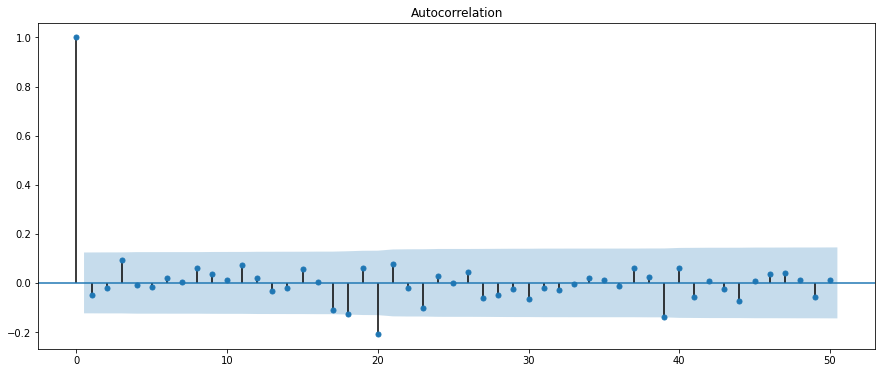

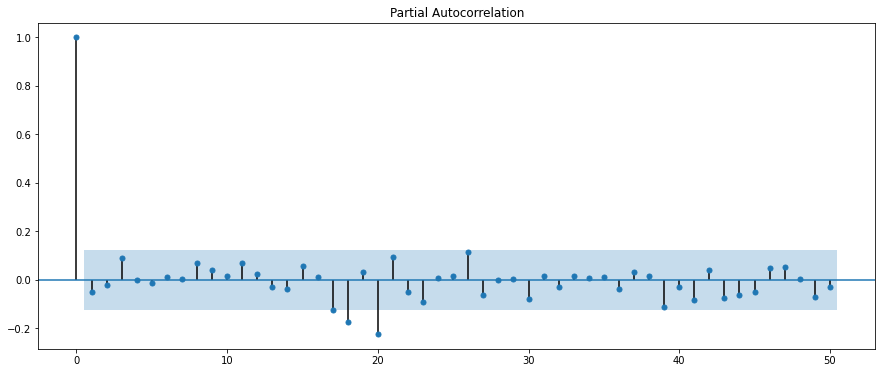

In [33]:
#####Simulación####
import numpy as np

import statsmodels as sm
import matplotlib.pylab as plt
import pandas as pd
import statsmodels.api as smapi

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
Tlength=250
ar = np.array([1, -0.7]) 
ma = np.array([1,0.6]) # add zero-lag y maparams tiene los otros parámetros
y = sm.tsa.arima_process.arma_generate_sample(ar, ma,Tlength) 
plt.plot(y)
ajuste=pm.auto_arima(y,start_p=0,start_q=0, max_p=3, max_q=3, d=0, D=0, seasonal=False)

ajuste.summary()
modeloest = smapi.tsa.statespace.SARIMAX(y, trend='n', order=(1,0,1))  
####Si tiene parte estacional agregar seasonal_order=(0,0,0,12)###
resultsmodeloest = modeloest.fit()

print(resultsmodeloest.summary())
resultsmodeloest.aic
###an´lisis de residuales
residuales=resultsmodeloest.resid
resultsmodeloest.plot_diagnostics()
plt.show()

resultsmodeloest.test_heteroskedasticity(method='breakvar')

resultsmodeloest.test_normality(method='jarquebera')

acf(residuales,nlags=50,unbiased=False)
plot_acf(residuales,lags=50,unbiased=False)
pacf(residuales,nlags=50)
plot_pacf(residuales,lags=50)

resultsmodeloest.test_serial_correlation(method='ljungbox')





modeloprueba = smapi.tsa.statespace.SARIMAX(np.log(tsAirP), trend='n', order=(0,1,1),seasonal_order=(0,1,1,12))  
resultsmodeloprueba = modeloprueba.fit()

print(resultsmodeloprueba.summary())

residuales=resultsmodeloprueba.resid